## IPL Data Analysis (2009-2020)

### __Importing all the required Libraries__

In [2]:
#importing all the necessary libraries for the project.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import requests
from bs4 import BeautifulSoup
from selenium import webdriver
import time
import re
import csv

In [3]:
#scraping data from website-iplt20.com.
url='https://www.iplt20.com/stats/{}/mostRuns?stats_type=batting'
page=requests.get(url)

In [4]:
soup=BeautifulSoup(page.content,'html.parser')  

In [5]:
page.content

b'<!DOCTYPE html>\n<html lang="en">\n    <head>\n        <meta charset="utf-8">\n        <meta name="viewport" content="width=device-width, initial-scale=1">\n\n        <title>Server Error</title>\n\n        <!-- Fonts -->\n        <link rel="preconnect" href="https://fonts.gstatic.com">\n        <link href="https://fonts.googleapis.com/css2?family=Nunito&display=swap" rel="stylesheet">\n\n        <style>\n            /*! normalize.css v8.0.1 | MIT License | github.com/necolas/normalize.css */html{line-height:1.15;-webkit-text-size-adjust:100%}body{margin:0}a{background-color:transparent}code{font-family:monospace,monospace;font-size:1em}[hidden]{display:none}html{font-family:system-ui,-apple-system,BlinkMacSystemFont,Segoe UI,Roboto,Helvetica Neue,Arial,Noto Sans,sans-serif,Apple Color Emoji,Segoe UI Emoji,Segoe UI Symbol,Noto Color Emoji;line-height:1.5}*,:after,:before{box-sizing:border-box;border:0 solid #e2e8f0}a{color:inherit;text-decoration:inherit}code{font-family:Menlo,Monaco,

In [6]:
#Scraping data for about 11 seasons.
soups = []
for i in range(2009,2020):
    url='https://www.iplt20.com/stats/{}/mostRuns?stats_type=batting'.format(i)
    page=requests.get(url)    
    soups.append(BeautifulSoup(page.content,'html.parser'))

#### 1. Player_name

In [7]:
#create empty lists and append extracted Playername and season data.
player_name = []
season = []
y = 2008
for soup in soups:   
    y += 1
    for val in soup.find_all(['h3','a'],class_=['np-team-name-first','np-team-name']):
        player_name.append(val.text.strip())
        season.append(y)
len(player_name)

1554

In [8]:
len(season)

1554

#### 2. Matches

In [9]:
#create empty list and append extracted matches data.
matches = []
for match in soups:  
    for val in match.find_all('td')[2::14]:
        if val.text!='Indian':
            matches.append(val.text)
len(matches)

1554

#### 3. Innings

In [10]:
#create empty list and append extracted innings data.
innings=[]
for inn in soups:
    for inning in inn.find_all('td')[3::14]:
        if inning.text!='\n\n':
            innings.append(inning.text)
len(innings)

1554

#### 4. NotOuts

In [11]:
#create empty list and append Notouts extracted data.
Not_outs=[]
for notout in soups:
    for no in notout.find_all('td')[4::14]:
        if no.text!='':
            Not_outs.append(no.text)
len(Not_outs)

1554

#### 5. Runs

In [12]:
#create empty list and append extracted runs data.
runs = []
for runs_scored in soups:
    for run in runs_scored.find_all('td',class_ = 'np-tableruns'):
        runs.append(run.text)
len(runs)

1554

#### 6. Highest Score

In [13]:
#create empty list and append extracted data.
Highest_score=[]
for high_score in soups:
    for highscore in high_score.find_all('td')[6::14]:
        if highscore.text!='':
            Highest_score.append(highscore.text)
len(Highest_score)

1554

#### 7. Average

In [14]:
#create empty list and append extracted Average data.
Average=[]
for average in soups:
    for avg in average.find_all('td')[7::14]:
        if avg.text[0].isnumeric():
            Average.append(avg.text)
len(Average)

1554

#### 8. Balls_Faced

In [15]:
#create empty list and append extracted bestfigure data.
balls_faced=[]
for b_f in soups:
    for bf in b_f.find_all('td')[8::14]:
        if bf.text!='':
            balls_faced.append(bf.text)
len(balls_faced)

1554

#### 9. Strikerate

In [16]:
#create empty list and append extracted strikerate data.
strike_rate=[]
for s_r in soups:
    for sr in s_r.find_all('td')[9::14]:
        strike_rate.append(sr.text)
len(strike_rate)

1554

#### 10. Centuries

In [17]:
#create empty list and append extracted 100's data.
Centuries=[]
for cents in soups:
    for huns in cents.find_all('td')[10::14]:
        Centuries.append(huns.text)
len(Centuries)

1554

#### 11. Half Centuries

In [18]:
#create empty list and append extracted 50's data.
half_centuries=[]
for half_cents in soups:
    for huns in half_cents.find_all('td')[11::14]:
        half_centuries.append(huns.text)
len(half_centuries)

1554

#### 12. Sixes

In [19]:
#create empty list and append extracted 6's data.
sixes=[]
for sixs in soups:
    for six in sixs.find_all('td')[13::14]:
        sixes.append(six.text)
len(sixes)

1554

#### 13. Fours

In [20]:
#create empty list and append extracted 4's data.
Fours=[]
for fors in soups:
    for four in fors.find_all('td')[12::14]:
        Fours.append(four.text)
len(Fours)

1554

### Create dataframe with certain columns.

In [21]:
#Creating a dataframe with 11 seasons data in perfect order and including each and every player.
df={'Player_Name':player_name,
    'Matches':matches,
    'Innings':innings,
    'Not_Outs':Not_outs,
    'Runs':runs,
    'Highest_Score':Highest_score,
    'Average':Average,
    'Balls_faced':balls_faced,
    'Strike_rate':strike_rate,
    'Centuries':Centuries,
    'Half_Centuries':half_centuries,
    'Sixes':sixes,
    'Fours':Fours,
    'Seasons':season}

In [22]:
data=pd.DataFrame(df)

In [84]:
data

,Player_Name,Matches,Innings,Not_Outs,Runs,Highest_Score,Average,Balls_faced,Strike_rate,Centuries,Half_Centuries,Sixes,Fours,Seasons
0,Matthew Hayden,12,12,1,572,89,52.00,395,144.81,0,5,22,60,2009
1,Adam Gilchrist,16,16,0,495,85,30.93,325,152.30,0,3,29,54,2009
2,Suresh Raina,14,14,0,434,98,31.00,308,140.90,0,2,21,37,2009
3,JP Duminy,13,12,3,372,62,41.33,325,114.46,0,5,11,26,2009
4,Herschelle Gibbs,14,14,3,371,69,33.72,331,112.08,0,4,12,32,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1549,Joe Denly,1,1,0,0,0,0.00,1,0.00,0,0,0,0,2019
1550,Khaleel Ahmed,9,1,0,0,0,0.00,1,0.00,0,0,0,0,2019
1551,Sam Billings,1,1,0,0,0,0.00,4,0.00,0,0,0,0,2019
1552,Prithvi Raj Yarra,2,1,1,0,0,0.00,1,0.00,0,0,0,0,2019


## Cleaning DataFrame

In [85]:
#Checking for null values and duplicates.
#each column type stored as different types, converting each type into
#accurate data type.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1554 entries, 0 to 1553
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Player_Name     1554 non-null   object 
 1   Matches         1554 non-null   int64  
 2   Innings         1554 non-null   int64  
 3   Not_Outs        1554 non-null   int64  
 4   Runs            1554 non-null   int64  
 5   Highest_Score   1554 non-null   int64  
 6   Average         1554 non-null   float64
 7   Balls_faced     1554 non-null   int64  
 8   Strike_rate     1554 non-null   float64
 9   Centuries       1554 non-null   int64  
 10  Half_Centuries  1554 non-null   int64  
 11  Sixes           1554 non-null   int64  
 12  Fours           1554 non-null   int64  
 13  Seasons         1554 non-null   int64  
dtypes: float64(2), int64(11), object(1)
memory usage: 170.1+ KB


In [86]:
#Clean and convert each columns(objects) into their accurate data type(float) and (int).

data["Matches"]        = data["Matches"].astype(int)
data['Innings']        = data['Innings'].astype(int)
data['Not_Outs']       = data['Not_Outs'].astype(int)
data['Runs']           = data['Runs'].astype(int)
data['Highest_Score']  = data['Highest_Score'].astype(int)
data['Balls_faced']   = data['Balls_faced'].astype(int)
data['Centuries']      = data['Centuries'].astype(int)
data['Half_Centuries'] = data['Half_Centuries'].astype(int)
data['Sixes']          = data['Sixes'].astype(int)
data['Fours']          = data['Fours'].astype(int)
data['Average']= data['Average'].astype(float)
data['Strike_rate']    = data['Strike_rate'].astype(float)

In [87]:
#Statistical measure of whole dataframe.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1554 entries, 0 to 1553
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Player_Name     1554 non-null   object 
 1   Matches         1554 non-null   int64  
 2   Innings         1554 non-null   int64  
 3   Not_Outs        1554 non-null   int64  
 4   Runs            1554 non-null   int64  
 5   Highest_Score   1554 non-null   int64  
 6   Average         1554 non-null   float64
 7   Balls_faced     1554 non-null   int64  
 8   Strike_rate     1554 non-null   float64
 9   Centuries       1554 non-null   int64  
 10  Half_Centuries  1554 non-null   int64  
 11  Sixes           1554 non-null   int64  
 12  Fours           1554 non-null   int64  
 13  Seasons         1554 non-null   int64  
dtypes: float64(2), int64(11), object(1)
memory usage: 170.1+ KB


## Data Visualization.

### Univariate data     – This type of data consists of only one variable.
### Bivariate data       – This type of data involves two different variables.
### Multivariate data  – When the data involves three or more variables, it is categorized under multivariate.

#### Uni-Variate Analysis

In [27]:
# 1.Creating Histogram for Runs,Avg,High_Score.

#### 1. Total_Runs

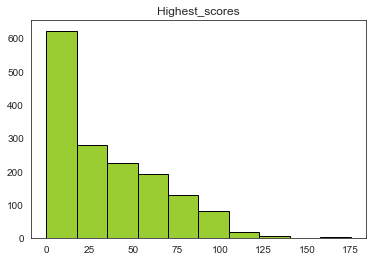

In [113]:
#About to create a graph which shows complete data of players total_runs.
plt.hist(data['Highest_Score'],bins=10,color='yellowgreen',edgecolor='k')
plt.title('Highest_scores')
plt.show()

In [29]:
data['Runs'].mode()

0    1
dtype: int64

#### 2. Average

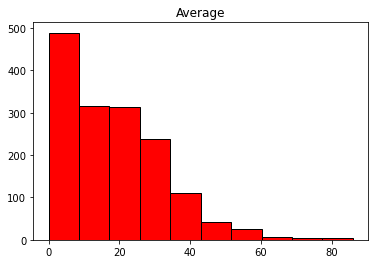

In [30]:
#Graph shows the batting average of all players.
plt.hist(data['Average'],bins=10,color='r',edgecolor='k')
plt.title('Average')
plt.show()

In [31]:
data['Average'].value_counts().nsmallest(20).astype(float)

15.77    1.0
32.42    1.0
33.33    1.0
29.40    1.0
39.20    1.0
18.06    1.0
22.81    1.0
16.63    1.0
25.81    1.0
27.61    1.0
31.22    1.0
32.44    1.0
19.57    1.0
30.84    1.0
11.27    1.0
19.40    1.0
27.76    1.0
17.41    1.0
18.75    1.0
12.80    1.0
Name: Average, dtype: float64

#### 3. High_score

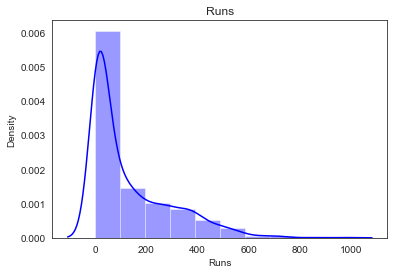

973

In [117]:
#creating a distribution plot which shows players high_score.
sns.distplot(data['Runs'],color='b',bins=10)
plt.title('Runs')
#plt.ylim(0,900)
plt.show()
data["Runs"].max()

In [75]:
data['Runs'].value_counts()
#data['Highest_Score'].max()

1      51
4      41
0      41
6      34
5      32
       ..
305     1
308     1
309     1
310     1
973     1
Name: Runs, Length: 428, dtype: int64

__Uni Variate - Bar Graph__

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1554 entries, 0 to 1553
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Player_Name     1554 non-null   object 
 1   Matches         1554 non-null   int64  
 2   Innings         1554 non-null   int64  
 3   Not_Outs        1554 non-null   int64  
 4   Runs            1554 non-null   int64  
 5   Highest_Score   1554 non-null   int64  
 6   Average         1554 non-null   float64
 7   Balls_faced     1554 non-null   int64  
 8   Strike_rate     1554 non-null   float64
 9   Centuries       1554 non-null   int64  
 10  Half_Centuries  1554 non-null   int64  
 11  Sixes           1554 non-null   int64  
 12  Fours           1554 non-null   int64  
 13  Seasons         1554 non-null   int64  
dtypes: float64(2), int64(11), object(1)
memory usage: 170.1+ KB


In [35]:
data.groupby(['Seasons'])['Runs'].max().to_frame()

,Runs
Seasons,
2009,572
2010,618
2011,608
2012,733
2013,733
2014,660
2015,562
2016,973
2017,641


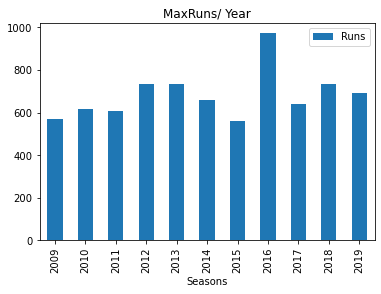

In [36]:
#Creating a bar graph that shows maximum runs for every season.
data.groupby(['Seasons'])['Runs'].max().to_frame().plot(kind='bar')
plt.title('MaxRuns/ Year')
plt.show()

__Uni Variate - Line Graph__

In [37]:
data['Player_Name'].to_list()

['Matthew Hayden',
 'Adam Gilchrist',
 'Suresh Raina',
 'JP Duminy',
 'Herschelle Gibbs',
 'Brad Hodge',
 'Sachin Tendulkar',
 'Rohit Sharma',
 'Jacques Kallis',
 'Yuvraj Singh',
 'MS Dhoni',
 'Kumar Sangakkara',
 'Ravindra Jadeja',
 'Brendon McCullum',
 'Ross Taylor',
 'Rahul Dravid',
 'Andrew Symonds',
 'Virat Kohli',
 'Yusuf Pathan',
 'Tirumalasetti Suman',
 'Sanath Jayasuriya',
 'Mahela Jayawardena',
 'Dwayne Bravo',
 'Dwayne Smith',
 'Graeme Smith',
 'Irfan Pathan',
 'Abhishek Nayar',
 'Sourav Ganguly',
 'Subramaniam Badrinath',
 'Robin Uthappa',
 'Chris Gayle',
 'Naman Ojha',
 'Manish Pandey',
 'Mark Boucher',
 'Simon Katich',
 'Ajinkya Rahane',
 'Parthiv Patel',
 'Ravi Bopara',
 'Venugopal Rao',
 'Karan Goel',
 'Roelof van der Merwe',
 'Sunny Sohal',
 'Shane Warne',
 'Rob Quiney',
 'David Hussey',
 'Swapnil Asnodkar',
 'Albie Morkel',
 'Kevin Pietersen',
 'Jacob Oram',
 'Harbhajan Singh',
 'Laxmi Ratan Shukla',
 'Lee Carseldine',
 'Abhishek Raut',
 'Wriddhiman Saha',
 'Azhar Bil

In [38]:
player = input()

Virat Kohli


In [39]:
x_player=data[data["Player_Name"]==player]

In [40]:
x_player.describe()

,Matches,Innings,Not_Outs,Runs,Highest_Score,Average,Balls_faced,Strike_rate,Centuries,Half_Centuries,Sixes,Fours,Seasons
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,14.909091,14.272727,2.272727,477.000000,79.545455,39.696364,359.545455,130.574545,0.454545,3.272727,16.909091,42.000000,2014.000000
std,1.868397,1.848833,1.618080,204.534105,19.531327,16.565121,126.059005,13.578890,1.213560,1.954017,8.525896,19.894723,3.316625
min,10.000000,10.000000,0.000000,246.000000,50.000000,22.360000,212.000000,111.650000,0.000000,1.000000,8.000000,22.000000,2009.000000
25%,14.000000,13.500000,1.500000,333.500000,67.500000,27.950000,273.000000,121.590000,0.000000,2.000000,11.500000,24.500000,2011.500000
50%,16.000000,14.000000,2.000000,464.000000,73.000000,33.140000,328.000000,130.820000,0.000000,3.000000,16.000000,35.000000,2014.000000
75%,16.000000,16.000000,3.500000,543.500000,95.500000,46.155000,421.500000,140.280000,0.000000,4.000000,20.000000,53.500000,2016.500000
max,16.000000,16.000000,5.000000,973.000000,113.000000,81.080000,640.000000,152.030000,4.000000,7.000000,38.000000,83.000000,2019.000000


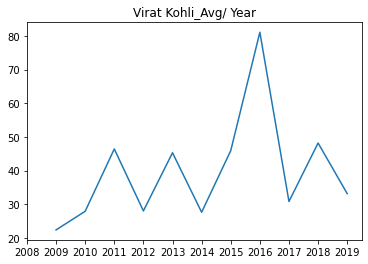

In [41]:
#Creating a line graph by considering each player average to check his performance throughtout all seasons.
plt.plot(np.arange(2009, 2020), x_player["Average"])
plt.title(f'{player}_Avg/ Year')
plt.xticks(np.arange(2008,2020))
plt.show()

#### Count Plot - It is used to Show the counts of observations in each categorical bin using bars.

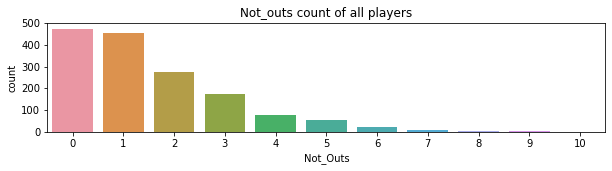

In [42]:
#Creating a custom seaborn count plot that counts all players notouts results.
plt.figure(figsize=(10,2))
sns.countplot(x='Not_Outs',data=data)
plt.ylim(0,500)
plt.title('Not_outs count of all players')
plt.show()

## Bi-Variate Analysis.
### Categorical Plots- Bar graphs plot categorical data and have gap between each bar.

In [43]:
#Extracting few best players data from dataframe and perform some operations.
virat_kohli=data[data['Player_Name']=='Virat Kohli']
robin_uthappa=data[data['Player_Name']=='Robin Uthappa']
rohit_sharma=data[data['Player_Name']=='Rohit Sharma']
ms_dhoni=data[data['Player_Name']=='MS Dhoni']

In [44]:
#Created a dataframe of few best players by concatenating their data.
top_player=pd.concat([virat_kohli,robin_uthappa,rohit_sharma,ms_dhoni])

In [45]:
top_player

,Player_Name,Matches,Innings,Not_Outs,Runs,Highest_Score,Average,Balls_faced,Strike_rate,Centuries,Half_Centuries,Sixes,Fours,Seasons
17,Virat Kohli,16,13,2,246,50,22.36,219,112.32,0,1,8,22,2009
150,Virat Kohli,16,13,2,307,58,27.90,212,144.81,0,1,12,26,2010
283,Virat Kohli,16,16,4,557,71,46.41,460,121.08,0,4,16,55,2011
447,Virat Kohli,16,15,2,364,73,28.00,326,111.65,0,2,9,33,2012
584,Virat Kohli,16,16,2,634,99,45.28,457,138.73,0,6,22,64,2013
750,Virat Kohli,14,14,1,359,73,27.61,294,122.10,0,2,16,23,2014
868,Virat Kohli,16,16,5,505,82,45.90,386,130.82,0,3,23,35,2015
993,Virat Kohli,16,16,4,973,113,81.08,640,152.03,4,7,38,83,2016
1151,Virat Kohli,10,10,0,308,64,30.80,252,122.22,0,4,11,23,2017
1278,Virat Kohli,14,14,3,530,92,48.18,381,139.10,0,4,18,52,2018


In [46]:
#converting few columns types (objects) into their original datatypes(int) and (floats).
top_player['Runs']=top_player["Runs"].astype(int)
top_player['Highest_Score']=top_player["Highest_Score"].astype(int)
top_player['Average']=top_player["Average"].astype(float)
top_player['Fours']=top_player["Fours"].astype(int)
top_player['Sixes']=top_player["Sixes"].astype(int)
top_player['Strike_rate']=top_player["Strike_rate"].astype(float)

In [47]:
#Statistical measure of whole dataframe.
top_player.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 17 to 1422
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Player_Name     44 non-null     object 
 1   Matches         44 non-null     int64  
 2   Innings         44 non-null     int64  
 3   Not_Outs        44 non-null     int64  
 4   Runs            44 non-null     int64  
 5   Highest_Score   44 non-null     int64  
 6   Average         44 non-null     float64
 7   Balls_faced     44 non-null     int64  
 8   Strike_rate     44 non-null     float64
 9   Centuries       44 non-null     int64  
 10  Half_Centuries  44 non-null     int64  
 11  Sixes           44 non-null     int64  
 12  Fours           44 non-null     int64  
 13  Seasons         44 non-null     int64  
dtypes: float64(2), int64(11), object(1)
memory usage: 5.2+ KB


#### 1. Box Plot - Box Plot is the visual representation of the depicting groups of numerical data through their quartiles. 

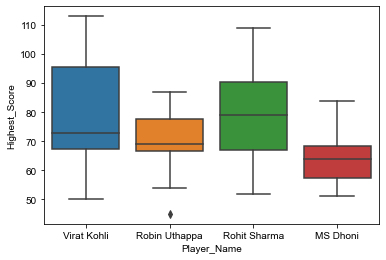

In [48]:
#box plot is created to get highest_score scored by each player.
plt.figure(figsize=(6,4))
sns.boxplot(x=top_player["Player_Name"],y=top_player['Highest_Score'])
# set seaborn style.
sns.set_style('dark')
plt.show()

#### 2. Voilon Plot - A violin plot plays a similar activity that is pursued through whisker or box plot do. As it shows several quantitative data across one or more categorical variables.

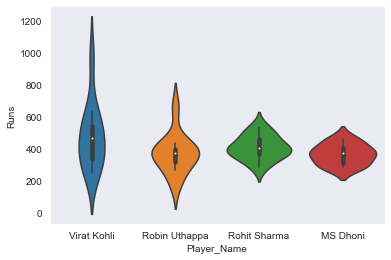

In [49]:
#creating a voilon plot to get most runs scored by a player.
plt.figure(figsize=(6,4))
sns.violinplot(x=top_player["Player_Name"],y=top_player['Runs'])
# set seaborn style.
sns.set_style('darkgrid')
plt.show()

#### 3. Strip Plot - A strip plot is drawn on its own. It is a good complement to a boxplot or violinplot in cases where all observations are shown along with some representation of the underlying distribution. 

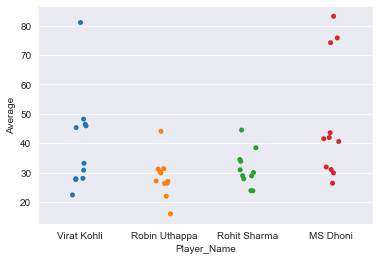

In [50]:
#Creting a strip plot to compare each player average.
plt.figure(figsize=(6,4))
sns.stripplot(x=top_player["Player_Name"],y=top_player['Average'])
# set seaborn style.
sns.set_style('white')
plt.show()

## Bi-Variate Analysis.
### Numerical Plots- Numerical data represent values that can be measured and put into a logical order. 

#### 1. Regression Plot  --->  Regression plots as the name suggests creates a regression line between 2 parameters and helps to visualize their linear relationships.

<Figure size 432x288 with 0 Axes>

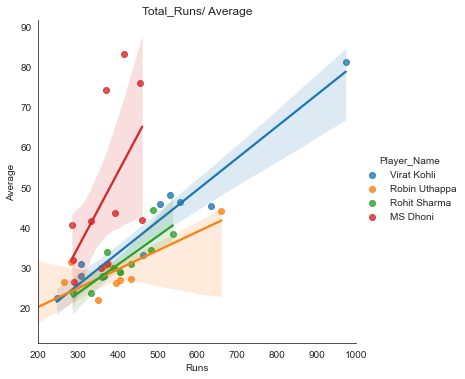

In [51]:
plt.figure(figsize=(6,4))
sns.lmplot(x="Runs",y="Average",hue='Player_Name',data=top_player)
# set seaborn style.
sns.set_style('dark')
plt.xlim(200,1000)
plt.title("Total_Runs/ Average")
plt.show()

#### 2. Scatter Plot --->  Scatterplot can be used with several semantic groupings which can help to understand well in a graph. They can plot two-dimensional graphics that can be enhanced by mapping up to three additional variables.

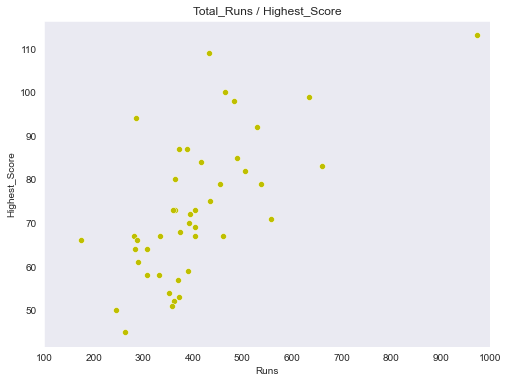

In [52]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=top_player["Runs"],y=top_player["Highest_Score"],color='y')
# set seaborn style
sns.set_style('ticks')
plt.xlim(100,1000)
plt.title('Total_Runs / Highest_Score')
plt.show()

#### 3. Relational plot --->  Relational plots are used for visualizing the statistical relationship between the data points. Visualization is necessary because it allows the human to see trends and patterns in the data. 

<Figure size 432x288 with 0 Axes>

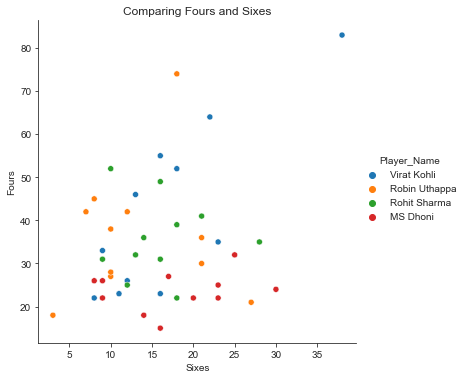

In [53]:
plt.figure(figsize=(6,4))
sns.relplot(x="Sixes",y="Fours",color='k',hue='Player_Name',data=top_player)
# set seaborn style
sns.set_style('whitegrid')
plt.title('Comparing Fours and Sixes')
plt.show()

## Multivariate Analysis

#### 1. Heat Map -  Heatmap is defined as a graphical representation of data using colors to visualize the value of the matrix. In this, to represent more common values or higher activities brighter colors basically reddish colors are used and to represent less common or activity values, darker colors are preferred. 

In [54]:
#creating a dataframe to work on some analysing methods.
#by dropping some unwanted data dataframe will be created.
data1=data.drop(['Player_Name','Matches','Innings','Not_Outs','Seasons'],axis=1)

In [55]:
#data correlated.
data1.corr()

,Runs,Highest_Score,Average,Balls_faced,Strike_rate,Centuries,Half_Centuries,Sixes,Fours
Runs,1.000000,0.888572,0.764894,0.984469,0.372506,0.378344,0.869588,0.859081,0.959868
Highest_Score,0.888572,1.000000,0.809268,0.870884,0.452821,0.402677,0.752268,0.790128,0.853519
Average,0.764894,0.809268,1.000000,0.738392,0.463928,0.317922,0.646433,0.688646,0.699480
Balls_faced,0.984469,0.870884,0.738392,1.000000,0.315492,0.324876,0.847335,0.787333,0.953980
Strike_rate,0.372506,0.452821,0.463928,0.315492,1.000000,0.132595,0.269475,0.412293,0.338974
Centuries,0.378344,0.402677,0.317922,0.324876,0.132595,1.000000,0.264309,0.413079,0.361544
Half_Centuries,0.869588,0.752268,0.646433,0.847335,0.269475,0.264309,1.000000,0.734092,0.851952
Sixes,0.859081,0.790128,0.688646,0.787333,0.412293,0.413079,0.734092,1.000000,0.733955
Fours,0.959868,0.853519,0.699480,0.953980,0.338974,0.361544,0.851952,0.733955,1.000000


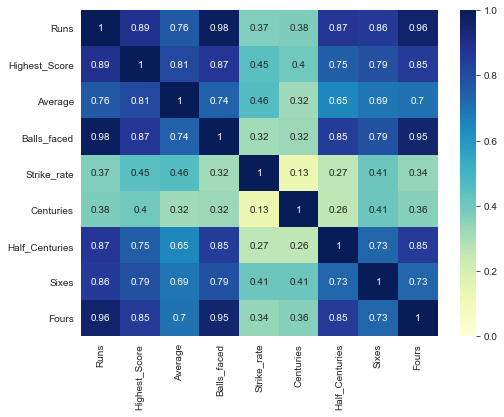

In [56]:
#Creating a heatmap with correlation data.
plt.figure(figsize=(8,6))
sns.heatmap(data1.corr(), cmap="YlGnBu", annot=True,vmin=0,vmax=1)
plt.show()

#### 2. PairPlot - To plot multiple pairwise bivariate distributions in a dataset, you can use the pairplot() function.

In [57]:
#creating a dataframe by concatinating few players database.
virat_kohli=data[data['Player_Name']=='Virat Kohli']
robin_uthappa=data[data['Player_Name']=='Robin Uthappa']
rohit_sharma=data[data['Player_Name']=='Rohit Sharma']
ms_dhoni=data[data['Player_Name']=='MS Dhoni']
top_player1=pd.concat([virat_kohli,robin_uthappa,rohit_sharma,ms_dhoni])

In [58]:
#new dataframe created after removing some uwanted columns.
top_player2=top_player1.drop(['Innings','Seasons','Runs','Balls_faced','Centuries','Half_Centuries','Sixes','Fours'],axis=1)

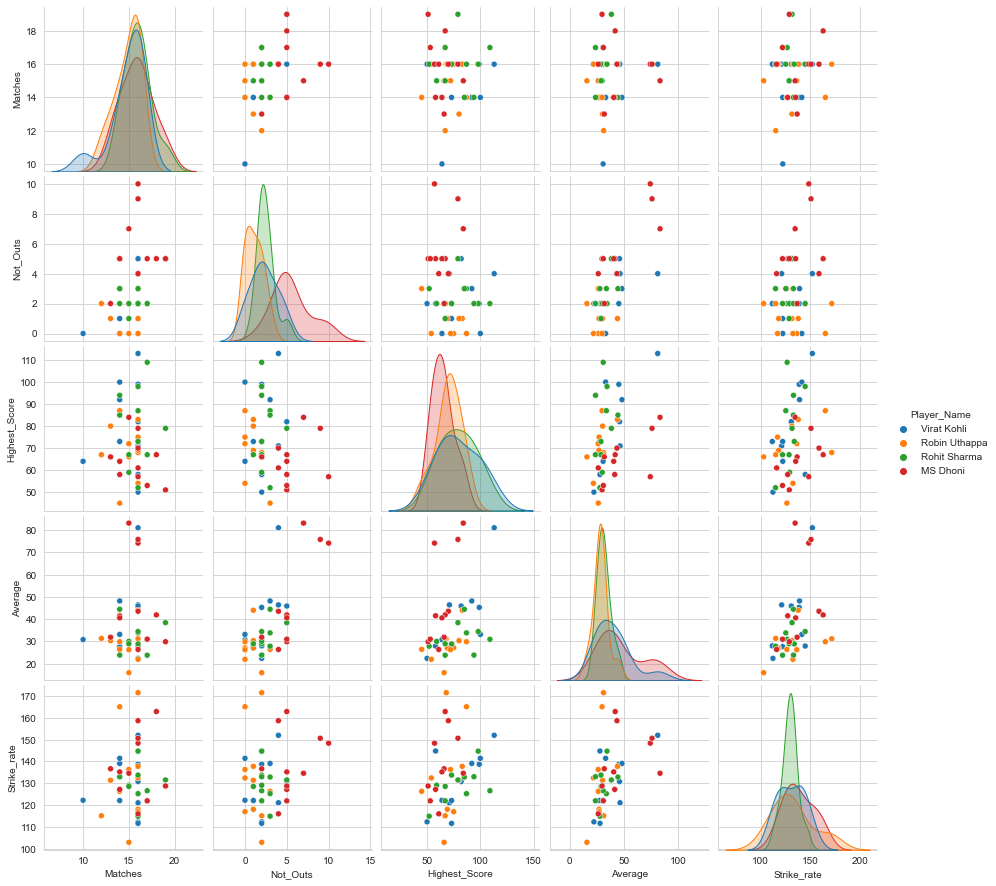

In [59]:
#import warnings to avoid warning pop-ups.
import warnings
warnings.filterwarnings('ignore')
sns.pairplot(data=top_player2,hue='Player_Name')
plt.show()

#### 3. Bubble Plot - A bubble plot is a scatterplot where the circle size is mapped to the value of a third numeric variable.

In [60]:
#Using Matplotlib, we can make bubble plot in Python using the scatter() function. 
#To make bubble plot, we need to specify size argument “s” for size of the data points.

In [61]:
player_1=data[data['Player_Name']=='Virat Kohli'].head()
player_2=data[data['Player_Name']=='Robin Uthappa'].head()
player_3=data[data['Player_Name']=='Rohit Sharma'].head()
player_4=data[data['Player_Name']=='MS Dhoni'].head()
new_player_list=pd.concat([player_1,player_2,player_3,player_4])

In [62]:
new_player_list

,Player_Name,Matches,Innings,Not_Outs,Runs,Highest_Score,Average,Balls_faced,Strike_rate,Centuries,Half_Centuries,Sixes,Fours,Seasons
17,Virat Kohli,16,13,2,246,50,22.36,219,112.32,0,1,8,22,2009
150,Virat Kohli,16,13,2,307,58,27.90,212,144.81,0,1,12,26,2010
283,Virat Kohli,16,16,4,557,71,46.41,460,121.08,0,4,16,55,2011
447,Virat Kohli,16,15,2,364,73,28.00,326,111.65,0,2,9,33,2012
584,Virat Kohli,16,16,2,634,99,45.28,457,138.73,0,6,22,64,2013
29,Robin Uthappa,15,13,2,175,66,15.90,170,102.94,0,1,3,18,2009
142,Robin Uthappa,16,14,2,374,68,31.16,218,171.55,0,3,27,21,2010
314,Robin Uthappa,14,13,3,264,45,26.40,209,126.31,0,0,10,27,2011
443,Robin Uthappa,16,16,1,405,69,27.00,343,118.07,0,2,10,38,2012
593,Robin Uthappa,16,16,0,434,75,27.12,371,116.98,0,2,12,42,2013


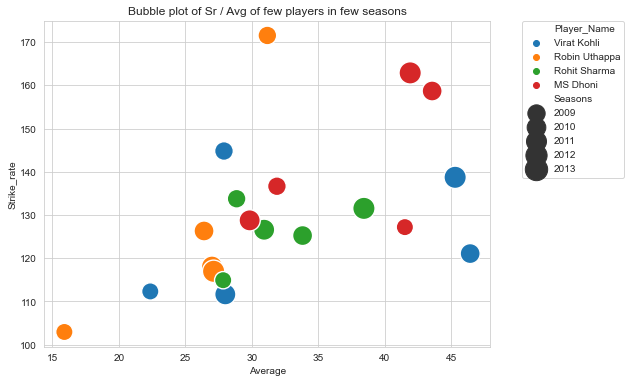

In [63]:
#creating a limited bubble plot by comparing strikerate and Average of few best players.
plt.figure(figsize=(8,6))
sns.scatterplot(x='Average', y='Strike_rate',size="Seasons", hue='Player_Name',sizes=(300,500),alpha=1.0,
                data=new_player_list)
# Put the legend out of the figure.
plt.legend(bbox_to_anchor=(1.3, 1),borderaxespad=0)
plt.title('Bubble plot of Sr / Avg of few players in few seasons')
plt.show()

In [64]:
#OBSERVATION.
#From the bubble plot we can see alot of observations.

#### 4. Contour Plot - Contour plots (sometimes called Level Plots) are a way to show a three-dimensional surface on a two-dimensional plane.

In [65]:
#Extracted few new players data
Suresh_Raina=data[data['Player_Name']=='Suresh Raina']
Ajinkya_Rahane=data[data['Player_Name']=='Ajinkya Rahane']
Yuvraj_Singh=data[data['Player_Name']=='Yuvraj Singh']
Ravindra_Jadeja=data[data['Player_Name']=='Ravindra Jadeja']
top_players=pd.concat([Suresh_Raina,Yuvraj_Singh,Ravindra_Jadeja,Ajinkya_Rahane])

In [66]:
#Created a dataframe of few different players data and plots a contour plot using their
#bestfig and Highscore data.
top_players

,Player_Name,Matches,Innings,Not_Outs,Runs,Highest_Score,Average,Balls_faced,Strike_rate,Centuries,Half_Centuries,Sixes,Fours,Seasons
2,Suresh Raina,14,14,0,434,98,31.00,308,140.90,0,2,21,37,2009
134,Suresh Raina,16,16,5,520,83,47.27,364,142.85,0,4,22,45,2010
288,Suresh Raina,16,16,2,438,73,31.28,325,134.76,0,4,17,36,2011
439,Suresh Raina,19,18,1,441,73,25.94,325,135.69,0,1,19,36,2012
585,Suresh Raina,18,17,4,548,100,42.15,365,150.13,1,4,18,50,2013
736,Suresh Raina,16,16,3,523,87,40.23,358,146.08,0,5,19,51,2014
877,Suresh Raina,17,17,2,374,62,24.93,304,123.02,0,2,16,31,2015
1002,Suresh Raina,15,15,1,399,75,28.50,312,127.88,0,3,10,39,2016
1133,Suresh Raina,14,14,3,442,84,40.18,307,143.97,0,3,13,42,2017
1285,Suresh Raina,15,15,3,445,75,37.08,336,132.44,0,4,12,46,2018


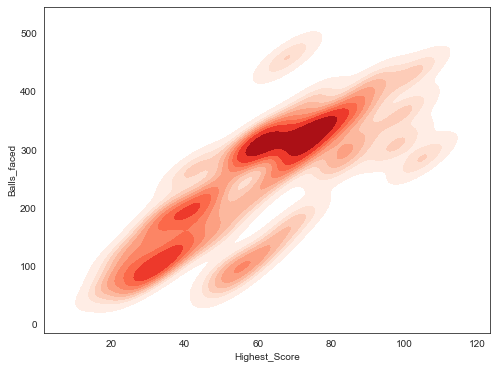

In [67]:
#Here we created a contour plot(density_plot) using kdeplot() function of seaborn library.
#bw_adjust : Bandwidth, smoothing parameter.
plt.figure(figsize=(8,6))
# set seaborn style
sns.set_style("white")
sns.kdeplot(x=top_players['Highest_Score'], y=top_players['Balls_faced'],cmap="Reds", shade=True, bw_adjust=.5)
plt.show()

In [68]:
###OBSERVATION.
#As we can observe after plotting countour plot, high_score of selected players is nearly equal to 120 and 
#best_figures is about 500.